In [317]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
from collections import defaultdict
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# RandomVariates
#### A library for generating random values from probability distributions

## Introduction

RandomVariates is a library of random variate generation routines.
The purpose behind this library was purely for educational purposes as 
a way to learn how to generate random variates using such methods as 
inverse transform, convolution, acceptance-rejection and composition 
methods. Additionally, this project was an excuse to get familiar with 
random number generators such as linear congruential generators, 
Tausworthe Generators and Widynski's "Squares: A Fast Counter-Based RNG"

### Pseudo Random Number Generators
The following pseudo random number (PRN) generators are contained in this project:
* A basic "desert island" linear congruential (implemented in the uniform function)
* taus() and tausunif(): A basic Tausworthe PRN generator and a Tausworthe Uniform 
PRN generator
* squaresrng(): Widynski's "Squares: A Fast Counter-Based RNG" 
https://arxiv.org/pdf/2004.06278.pdf 

#### Helper functions 

RandomVariates contain various helper functions to take advantage of the PRN generators

* randseed(): Helper function to grab a "smaller" PRN from the Widynski squares PRN 
generator
* generateseed(): Helper function to generate random seeds if the initial seed has 
not been set
* set_seed() and get_seed(): Functions to get and set the seed.
* reverse(): Helper function to reverse an integer 

### Random Variate Generation Routines
* **uniform()**: Routine to generate uniform random variates between a and b. **Default uniform(a=0, b=1)**

* **norm()**: Method to generate random normals. **Default norm(mu=0, sd=1)**

* **exponential()**: Generate exponential random variates. **Default exponential(lam=1)**

* **erlang()**: Routine to generate Erlang_k(lambda) random variates. **Default erlang(lam=1, k=1, n=1)**

* **weibull()**: Method to generate weibull random variates: **Default weibull(lam=1, beta=1)**

* **triangular()**: Generate triangular random variates with a-lower, b-mode and c-upper **Default triangular(a=0, b=1, c=2)**

* **bernoulli()**: random variates **Default bernoulli(p=0.5)**

* **Binomial()**: Routine to generate binomial random variates **Default binomial(t=1, p=0.5)**

* **dicetoss()**: Simple/fun method to generate X-sides dice toss. **Default is a simple 6-sided dicetoss(sides=6)**

* **geometric()**: Method to generate geometric random variates **Default geometric(p=0.5)**

* **negbin()**: Routine to generate discrete random negative binomials **Default negbin(t=1, p=0.5)**

* **chisq()**: Generate Chi-squared random variates **Default chisq(df=1)**

* **poisson()**: Method to generate Poisson random variates **Default poisson(lam=1)**

* **gamma()**: Gamma random variates shape parameter k and a scale parameter θ. Implementation is based on Marsaglia and Tsang's transformation-rejection method of generating gamma random variates (https://dl.acm.org/doi/10.1145/358407.358414) **Default gamma(k=1.0, theta=1)**

* **lognormal()**: Generate lognormal random variates **Default lognormal(mu=0, sd=1)**

* **beta()**: Routine to generate beta random variates **Default beta(a=1, b=1)**

### Limitations
* Unlike Numpy's random variate generation routines, these are written
in python. Numpy's random routines are written in C hence are much, much faster.
* Beta and Gamma distributions only accept a, b, k and theta greater than one. 
Other random variate implementations, such as Numpy can handle values between
0 and 1.
* Setting the seed does not affect the Tausworthe and Tausworthe Uniform PRN 
generators

#### Distributions not currently implemented
* Pearson Type V
* Pearson Type VI
* Log-Logistic
* Johnson Bounded and Johnson unbounded
* Bézier
* Others ...

### Installation
#### Requirements:
* Python 3.x
* pip (https://pip.pypa.io/en/stable/installation/)

To install the library, simply run the command:
* **pip install randvars**

The pip package can be located here: https://pypi.org/project/randvars/

Source code can be located here: https://github.com/jgoodie/randomvariates

### Usage
To use the library, you need to import the library into your python script then 
create an instance of random variates:

In [12]:
rv.set_seed(42)
rv.beta(n=10)

array([0.01995716, 0.17130101, 0.76265212, 0.79574511, 0.92940737,
       0.71737904, 0.6330573 , 0.15320698, 0.70551599, 0.98935137])

In [2]:
import randomvariates
rv = randomvariates.random.RandomVariates()

Alternately you can import random from randomvariates:

In [3]:
from randomvariates import random
rv = random.RandomVariates()

#### Seeds
By default, a seed is not set when an instance or randomvariates is called.

When a seed is set to None, randomvariates will randomly generate values for the
various random variate routines. 

For repeatability, we can set a seed by calling 
the *set_seed()* method. Once a seed has been set, we can verify by calling the 
*get_seed()* method.

In [4]:
rv.set_seed(42)
rv.get_seed()

42

#### Pseudo Random Number Generators
To call the Widynski Squares PRN we can call the *squaresrng()* method. 

The *squaresrng()* method takes a center and key value. By default, the center
and key are set to 1: 

**squaresrng(ctr=1, key=1)**

In [5]:
rv.squaresrng(42,21)

22904061750312427071608663841693658494663185320788517623007713567980053732104718807902410691731255108163475339984462249791973853173096390867949739437289512015166556428304384

As of 11-06-2021, the Tausworthe PRN  and Tausworthe Uniform PRN generator does 
not take a seed value (See Limitations above)

To call the Tausworthe generators, simply call *taus()* and *tausunif().

By default *taus()* will generate 100 binary PRNs and *tausunif()* will generate 
a single uniform(0,1):

In [12]:
# rv.taus(n=100)
rv.taus()

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [13]:
# rv.tausunif(n=1)
rv.tausunif()

array([0.01468632])

**Let's look at the Tausworthe uniform values to see what we get for a mean and variance:**

In [30]:
unifs = rv.tausunif(n=100000)
print(np.mean(unifs))
print(np.var(unifs)) # 1/12 = 0.0833333333

0.49862412107230375
0.08314207985131612


**Plot of the Tausworthe generated uniforms.**

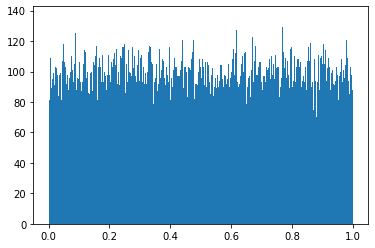

In [31]:
plt.hist(unifs, bins=1000)
plt.show()

**Chi-squared goodness of fit for the Tausworthe generated uniforms**

Note the test statistic of 1.4453 and p-value of 0.99357. As a sanity check, the 

Chi-squared with df=9 at an alpha of 0.05 we get 16.919. From the output below we it's obvious that 1.44 is less than 16.919 which makes sense given our huge p-value of 0.99357. **In this case we fail to reject H0.**

https://people.richland.edu/james/lecture/m170/tbl-chi.html

In [115]:
n=10
unifs = rv.tausunif(n=n)
exp = np.ones(n)*0.5
stats.chisquare(f_obs=unifs, f_exp=exp, ddof=1, axis=0)

Power_divergenceResult(statistic=1.4453697386310762, pvalue=0.9935783057893472)

**Linear Congruential Generator (LCG) and Uniform Distribution**

The primary Uniform PRN generator for the randomvariates library is based off a "desert island" LCG of the form:

$
\begin{align}
X_{i} = 16807X_{i-1} mod(2^{32} - 1)
\end{align}
$

**To call the uniform PRN generator simply call uniform() method:**

In [119]:
rv.uniform()

array([0.05257237])

**To generate more than one unif(0,1), call the method with n=X where X is the number 
of unif(0,1)s to generate:**

In [122]:
rv.uniform(n=25)

array([0.05257237, 0.58375326, 0.14097247, 0.32435023, 0.35433263,
       0.26846135, 0.0299879 , 0.00658945, 0.74895567, 0.69787797,
       0.23502476, 0.06106509, 0.32097407, 0.61113629, 0.36767406,
       0.49790078, 0.21841041, 0.82377019, 0.10552924, 0.62995875,
       0.71667283, 0.12018592, 0.96479814, 0.36233659, 0.79098412])

**If we want to generate something other than unif(0,1), we can call the function
with a=X and b=Y where X and Y are the lower and upper bounds of the uniform 
distribution:**

In [123]:
rv.uniform(a=7, b=11, n=25)

array([ 7.21028946,  9.33501302,  7.56388989,  8.29740092,  8.41733051,
        8.07384542,  7.11995159,  7.02635782,  9.99582266,  9.79151188,
        7.94009902,  7.24426036,  8.28389627,  9.44454517,  8.47069623,
        8.99160312,  7.87364164, 10.29508075,  7.42211697,  9.51983499,
        9.8666913 ,  7.48074369, 10.85919256,  8.44934634, 10.16393646])

**Again, as we did with the Tausworthe uniforms, let's check the mean and variance:**

In [127]:
unifs = rv.uniform(n=1000000)
print(np.mean(unifs)) # 0.5
print(np.var(unifs)) # 1/12 = 0.0833333333

0.49926189331773324
0.08334189169747183


**Again, let's plot the uniforms to see what they look like**

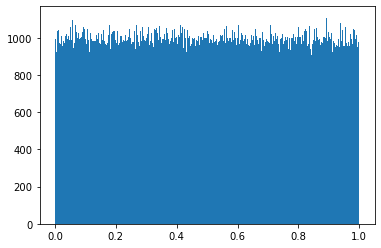

In [128]:
plt.hist(unifs, bins=1000)
plt.show()

**Note when we generate two sets of uniforms with the same seed and plot them against each other, we get a straight line**

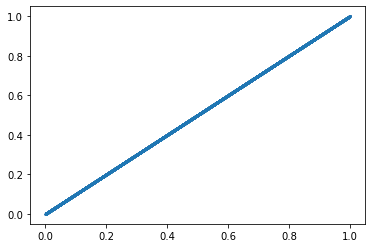

In [129]:
x = rv.uniform(n=100000)
y = rv.uniform(n=100000)

plt.scatter(x, y, s=0.8, alpha=0.2)
plt.show()

**Let's try again, each uniform with different seeds**

Note below the nice image of a TV static.

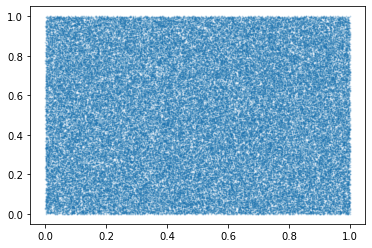

In [130]:
rv.set_seed(0)
x = rv.uniform(n=100000)
rv.set_seed(1)
y = rv.uniform(n=100000)

plt.scatter(x, y, s=0.8, alpha=0.2)
plt.show()

**To make sure we don't get any "RANDU" effects, let's create a 3-D plot**

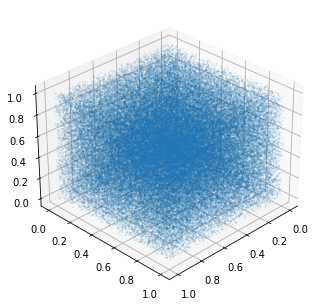

In [131]:
x = random.RandomVariates()
x.set_seed(1*3.141)

y = random.RandomVariates()
y.set_seed(2*3.141)

z = random.RandomVariates()
z.set_seed(3*3.141)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False, azim=45)
fig.add_axes(ax)

sequence_containing_x_vals = x.uniform(n=100000)
sequence_containing_y_vals = y.uniform(n=100000)
sequence_containing_z_vals = z.uniform(n=100000)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, s=0.8, alpha=0.1)
plt.show()

#### Normal Distribution


To generate random normal random variates, call the norm() function. By default, 
the norm() function will generate values with mean = 0 and standard deviation = 1.


In [134]:
rv.set_seed(42) # Set our seed back to 42
rv.norm(n=25)

array([-1.41895603,  1.03055739,  0.64797237, -0.54395554,  1.41565353,
       -1.58770622, -2.02602564, -0.29023875,  0.71303646, -0.09758493,
        0.67348912, -1.57582437,  0.2270985 , -0.10001884,  0.41797698,
       -0.99798613, -1.73261847,  0.53073999,  1.78233654,  0.94442933,
       -0.38071356, -0.51034473,  0.22164846, -0.66787692, -0.32286354])

**To generate normals with other means and standard deviations, simply specify them 
when calling the function:**

In [135]:
rv.norm(mu=42, sd=21, n=25)

array([12.20192344, 63.64170513, 55.60741974, 30.57693373, 71.72872421,
        8.65816942, -0.54653844, 35.90498633, 56.97376558, 39.95071654,
       56.14327153,  8.90768817, 46.76906844, 39.89960435, 50.77751655,
       21.04229136,  5.61501208, 53.1455398 , 79.42906729, 61.83301601,
       34.00501532, 31.28276068, 46.65461775, 27.97458477, 35.21986557])

**To check that our Nor(0,1) are generating a mean of 0 and variance of 1**

In [138]:
z = rv.norm(n=1000000)
mean = np.mean(z)
var = np.var(z)
print(f"mean: {mean}")
print(f"var: {var}")

mean: -0.0010792786142373445
var: 1.0020209597387706


**Do our normals, look normal?**

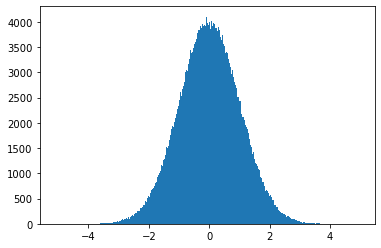

In [142]:
z = rv.norm(mu=0, sd=1, n=1000000)
plt.hist(z, bins=1000)
plt.show()

**Let's see what the Q-Q plot looks like:**

Note that our random normals fall nicely on the 45 degree line.

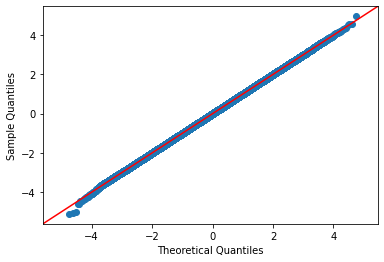

In [145]:
z = rv.norm(mu=0, sd=1, n=1000000)
sm.qqplot(z, line='45');

**Finally let's run a Shapiro Wilk test for normality.**

Note the test statistic and p-value. Since the p-value is much greater that 0.05, we fail to reject the null hypothesis.

In [156]:
z = rv.norm(mu=0, sd=1, n=25)
stats.shapiro(z)

ShapiroResult(statistic=0.9745835065841675, pvalue=0.7614504098892212)

#### Exponential Random Variates

To generate exponential random values, we can call the the exponential() function.

By default, the exponential() function will generate a single, lambda=1 random variate.

In [158]:
rv.exponential()

array([0.05400472])

To generate exponentials with different rates (lambda), call the exponential function
with lam=X, where X is 1/X rate:

In [161]:
rv.exponential(lam=3, n=25)

array([0.01800157, 0.29215902, 0.05065144, 0.13069348, 0.1458236 ,
       0.10420174, 0.01014891, 0.00220375, 0.46070858, 0.39897476,
       0.08930394, 0.02100304, 0.12903199, 0.31484212, 0.15278343,
       0.22965251, 0.08214183, 0.57865546, 0.03717436, 0.33138026,
       0.42038432, 0.04268156, 1.11555212, 0.14998157, 0.52178168])

**Check the mean and variance of our exponential random variates.**

If lambda is 2, then we should see a mean of 1/2 and variance of 1/4

In [167]:
# expo mean = 1/lam
# expo var = 1/lam^2
e = rv.exponential(lam=2, n=1000000)
mean = np.mean(e)
var = np.var(e)
print(f'mean: {mean}') # 1/2
print(f'var: {var}') # 1/4

mean: 0.499091656691787
var: 0.25017014791880715


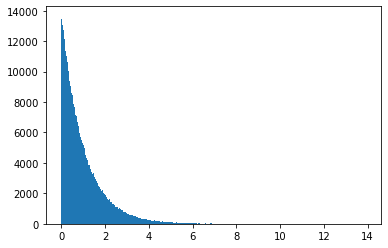

In [235]:
e = rv.exponential(lam=1, n=1000000)
plt.hist(e, bins=1000)
plt.show()

**Chi-squared goodness-of-fit for Exponentials**

In [334]:
rv.set_seed(55)
e_obs = rv.exponential(lam=1/9, n=100)
mean = np.mean(e_obs)
var = np.var(e_obs)
print(f'mean: {mean}') # 9.00

mean: 9.00471853961017


In [335]:
# 0.2 = 1/5 or 5 intervals
for i in range(5):
    print(-9*np.log(1-0.2*i))

-0.0
2.0082919618278874
4.597430613893916
8.246616586867399
14.484941211906904


In [336]:
intervals = defaultdict(int)
for e in e_obs:
    if 0.0 <= e < 2.01:
        intervals[1] += 1
    elif 2.01 <= e < 4.60:
        intervals[2] += 1
    elif 4.60 <= e < 8.25:
        intervals[3] += 1
    elif 8.25 <= e < 14.48:
        intervals[4] += 1
    else:
        intervals[5] += 1

$
\begin{align}
χ^{2}_{0.05,3} = 7.81
\end{align}
$

Since χ0 is less than 7.81 we fail to reject the null hypothesis

In [361]:
Oi = np.array(list(intervals.values()))
Ei = np.ones(5)*(100/5)
x0 = np.sum(((Oi - Ei)**2)/Ei)
x0

1.9

#### Erlang Random Variates

Random Erlang variates can be generated by calling the erlang() function. By default,
the erlang function will generate variates with lambda = 1 and shape (k) = 1:

In [362]:
rv.erlang()

array([2.90653443])

To generate erlangs with different rate and shape parameters, set lam=X and k = Y,
where X is the lambda rate and Y is the shape:

In [363]:
rv.erlang(lam=5, k=5, n=25)

array([2.90653443, 0.28490787, 1.31639086, 0.02388208, 0.99698642,
       0.49312927, 1.4190778 , 1.44550198, 1.63030961, 0.03153526,
       1.35967313, 2.22646588, 0.46427432, 0.31402456, 0.63147871,
       3.1275241 , 0.53362472, 0.11605216, 0.82909548, 1.16377254,
       0.08004277, 1.87768138, 0.62528821, 0.60440012, 0.96715853])

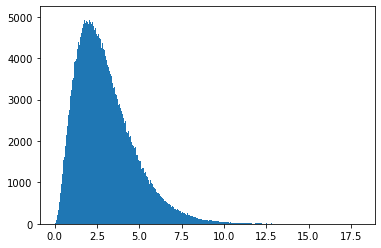

In [375]:
rv.set_seed(None)
erls = rv.erlang(lam=1, k=3, n=1000000)
plt.hist(erls, bins=1000)
plt.show()